# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [2]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file

df = pd.read_parquet('../trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [5]:
df.shape

(3041714, 19)

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [3]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload
df = pd.read_parquet('../trip_records/2023-1.parquet')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

In [70]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os
import glob

# Select the folder having data files
# os.chdir('../trip_records/')

# Create a list of all the twelve files to read
# file_list = os.listdir()
file_list = sorted(glob.glob("../trip_records/*.parquet"))
print(file_list)
# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        data = pd.read_parquet(file_path)
        #data.columns = data.columns.str.strip().str.lower()

        # Filter for 2023 only
        data = data[data['tpep_pickup_datetime'].dt.year == 2023].copy()

        # Extract date and hour
        data['date'] = data['tpep_pickup_datetime'].dt.date
        data['hour'] = data['tpep_pickup_datetime'].dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in data['date'].unique():
            day_data = data[data['date'] == date]
            
            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_data = day_data[day_data['hour'] == hour]

                # Sample 5% of the hourly data randomly
                if not hour_data.empty:
                    sampled_hour = hour_data.sample(frac=0.008, random_state=42)
                    sampled_data = pd.concat([sampled_data, sampled_hour], ignore_index=True)
                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

print(df.shape)

['../trip_records\\2023-1.parquet', '../trip_records\\2023-10.parquet', '../trip_records\\2023-11.parquet', '../trip_records\\2023-12.parquet', '../trip_records\\2023-2.parquet', '../trip_records\\2023-3.parquet', '../trip_records\\2023-4.parquet', '../trip_records\\2023-5.parquet', '../trip_records\\2023-6.parquet', '../trip_records\\2023-7.parquet', '../trip_records\\2023-8.parquet', '../trip_records\\2023-9.parquet']
(303397, 22)


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [71]:
df.shape

(303397, 22)

In [72]:
# Store the df in csv/parquet
df.to_csv('../trip_records/uncleaned_nyc_2023.csv', index=False)

In [73]:
df.columns, len(df.columns)

(Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
        'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
        'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
        'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
        'total_amount', 'congestion_surcharge', 'airport_fee', 'date', 'hour',
        'Airport_fee'],
       dtype='object'),
 22)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [52]:
# Load the new data file
final_df = pd.read_csv('../trip_records/uncleaned_nyc_2023.csv')
final_df.shape

(303397, 22)

In [53]:
# check random samples
final_df.iloc[1000:1030,:]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
1000,1,2023-01-02 18:14:47,2023-01-02 18:16:48,2.0,0.70,1.0,N,238,151,1,...,0.5,2.30,0.00,1.0,13.90,2.5,0.00,2023-01-02,18,NaN
1001,2,2023-01-02 18:41:38,2023-01-02 18:57:46,1.0,5.97,1.0,N,132,28,2,...,0.5,0.00,0.00,1.0,29.55,0.0,1.25,2023-01-02,18,NaN
1002,2,2023-01-02 18:53:06,2023-01-02 18:57:08,1.0,0.52,1.0,N,114,114,1,...,0.5,2.00,0.00,1.0,11.80,2.5,0.00,2023-01-02,18,NaN
1003,1,2023-01-02 18:51:01,2023-01-02 19:19:51,1.0,18.30,1.0,N,132,36,1,...,0.5,14.00,0.00,1.0,84.15,0.0,1.25,2023-01-02,18,NaN
1004,2,2023-01-02 18:12:31,2023-01-02 18:45:05,1.0,10.68,1.0,N,132,225,1,...,0.5,9.83,0.00,1.0,58.98,0.0,1.25,2023-01-02,18,NaN
1005,2,2023-01-02 19:07:45,2023-01-02 19:30:33,1.0,10.54,2.0,N,93,79,1,...,0.5,17.11,6.55,1.0,102.66,2.5,0.00,2023-01-02,19,NaN
1006,2,2023-01-02 19:01:01,2023-01-02 19:47:06,3.0,17.62,3.0,N,230,1,2,...,0.0,0.00,13.75,1.0,108.45,0.0,0.00,2023-01-02,19,NaN
1007,1,2023-01-02 19:01:02,2023-01-02 19:08:59,1.0,2.40,1.0,N,161,43,1,...,0.5,1.93,0.00,1.0,18.03,2.5,0.00,2023-01-02,19,NaN
1008,2,2023-01-02 19:42:35,2023-01-02 20:24:48,1.0,22.07,2.0,N,132,231,1,...,0.5,17.08,10.17,1.0,102.50,2.5,1.25,2023-01-02,19,NaN
1009,2,2023-01-02 19:19:14,2023-01-02 19:36:59,1.0,3.81,1.0,N,79,163,1,...,0.5,4.76,0.00,1.0,28.56,2.5,0.00,2023-01-02,19,NaN


In [54]:
 final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303397 entries, 0 to 303396
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               303397 non-null  int64  
 1   tpep_pickup_datetime   303397 non-null  object 
 2   tpep_dropoff_datetime  303397 non-null  object 
 3   passenger_count        293215 non-null  float64
 4   trip_distance          303397 non-null  float64
 5   RatecodeID             293215 non-null  float64
 6   store_and_fwd_flag     293215 non-null  object 
 7   PULocationID           303397 non-null  int64  
 8   DOLocationID           303397 non-null  int64  
 9   payment_type           303397 non-null  int64  
 10  fare_amount            303397 non-null  float64
 11  extra                  303397 non-null  float64
 12  mta_tax                303397 non-null  float64
 13  tip_amount             303397 non-null  float64
 14  tolls_amount           303397 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [55]:
# Fix the index and drop any columns that are not needed

final_df.reset_index(inplace=True, drop=True)

In [56]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303397 entries, 0 to 303396
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               303397 non-null  int64  
 1   tpep_pickup_datetime   303397 non-null  object 
 2   tpep_dropoff_datetime  303397 non-null  object 
 3   passenger_count        293215 non-null  float64
 4   trip_distance          303397 non-null  float64
 5   RatecodeID             293215 non-null  float64
 6   store_and_fwd_flag     293215 non-null  object 
 7   PULocationID           303397 non-null  int64  
 8   DOLocationID           303397 non-null  int64  
 9   payment_type           303397 non-null  int64  
 10  fare_amount            303397 non-null  float64
 11  extra                  303397 non-null  float64
 12  mta_tax                303397 non-null  float64
 13  tip_amount             303397 non-null  float64
 14  tolls_amount           303397 non-nu

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [57]:
final_df['airport_fee'].isna().sum(), final_df['Airport_fee'].isna().sum()

(279632, 33947)

In [58]:
# Combine the two airport fee columns
final_df['airport_fee'] = final_df['Airport_fee'].combine_first(final_df['airport_fee'])

final_df.drop(columns=['Airport_fee'], inplace=True)

In [59]:
final_df['airport_fee'].isna().sum()

10182

In [60]:
final_df.columns, final_df.shape

(Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
        'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
        'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
        'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
        'total_amount', 'congestion_surcharge', 'airport_fee', 'date', 'hour'],
       dtype='object'),
 (303397, 21))

In [61]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303397 entries, 0 to 303396
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               303397 non-null  int64  
 1   tpep_pickup_datetime   303397 non-null  object 
 2   tpep_dropoff_datetime  303397 non-null  object 
 3   passenger_count        293215 non-null  float64
 4   trip_distance          303397 non-null  float64
 5   RatecodeID             293215 non-null  float64
 6   store_and_fwd_flag     293215 non-null  object 
 7   PULocationID           303397 non-null  int64  
 8   DOLocationID           303397 non-null  int64  
 9   payment_type           303397 non-null  int64  
 10  fare_amount            303397 non-null  float64
 11  extra                  303397 non-null  float64
 12  mta_tax                303397 non-null  float64
 13  tip_amount             303397 non-null  float64
 14  tolls_amount           303397 non-nu

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [62]:
# check where values of fare amount are negative

# No negative values found
final_df[final_df['fare_amount'] < 0]

# final_df[final_df['total_amount'] < 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour


Did you notice something different in the `RatecodeID` column for above records?

In [63]:
# No negative values found for fare_amount

In [64]:
# Analyse RatecodeID for the negative fare amounts
rate_df = final_df[final_df['fare_amount'] < 0]
print('fare_amount', ', ', 'RatecodeID ->',rate_df['RatecodeID'].unique())


fare_amount ,  RatecodeID -> []


In [65]:
# Find which columns have negative values

cols_to_check = [
    'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
    'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee'
]

for col in cols_to_check:
    negative_count = (final_df[col] < 0).sum()
    print(f"Negative values in '{col}': {negative_count}")

Negative values in 'fare_amount': 0
Negative values in 'extra': 1
Negative values in 'mta_tax': 11
Negative values in 'tip_amount': 0
Negative values in 'tolls_amount': 0
Negative values in 'improvement_surcharge': 11
Negative values in 'total_amount': 11
Negative values in 'congestion_surcharge': 6
Negative values in 'airport_fee': 2


In [66]:
# fix these negative values

cols_to_check = [
    'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
    'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee'
]


for col in cols_to_check:
    final_df[col] = final_df[col].mask(final_df[col] < 0, 0)


In [67]:
# final check for negative values
cols_to_check = [
    'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
    'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee'
]

for col in cols_to_check:
    negative_count = (final_df[col] < 0).sum()
    print(f"Negative values in '{col}': {negative_count}")


Negative values in 'fare_amount': 0
Negative values in 'extra': 0
Negative values in 'mta_tax': 0
Negative values in 'tip_amount': 0
Negative values in 'tolls_amount': 0
Negative values in 'improvement_surcharge': 0
Negative values in 'total_amount': 0
Negative values in 'congestion_surcharge': 0
Negative values in 'airport_fee': 0


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [68]:
# Find the proportion of missing values in each column
missing_proportion = final_df.isna().mean()
print(missing_proportion)

VendorID                 0.00000
tpep_pickup_datetime     0.00000
tpep_dropoff_datetime    0.00000
passenger_count          0.03356
trip_distance            0.00000
RatecodeID               0.03356
store_and_fwd_flag       0.03356
PULocationID             0.00000
DOLocationID             0.00000
payment_type             0.00000
fare_amount              0.00000
extra                    0.00000
mta_tax                  0.00000
tip_amount               0.00000
tolls_amount             0.00000
improvement_surcharge    0.00000
total_amount             0.00000
congestion_surcharge     0.03356
airport_fee              0.03356
date                     0.00000
hour                     0.00000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [69]:
# Display the rows with null values
print(final_df[final_df.isna().any(axis=1)])
# Impute NaN values in 'passenger_count'
final_df['passenger_count'].value_counts(dropna=False)

        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4              2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
15             2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
45             2  2023-01-01 01:46:00   2023-01-01 02:15:00              NaN   
46             2  2023-01-01 01:10:00   2023-01-01 01:41:00              NaN   
61             2  2023-01-01 01:18:30   2023-01-01 01:46:19              NaN   
...          ...                  ...                   ...              ...   
303238         1  2023-09-30 21:50:20   2023-09-30 22:06:38              NaN   
303303         1  2023-09-30 22:53:15   2023-09-30 23:10:04              NaN   
303349         2  2023-09-30 23:27:39   2023-09-30 23:43:22              NaN   
303368         1  2023-09-30 23:12:36   2023-09-30 23:36:35              NaN   
303385         1  2023-09-30 23:31:35   2023-09-30 23:41:26              NaN   

        trip_distance  RatecodeID store

passenger_count
1.0    221052
2.0     44096
3.0     11004
NaN     10182
4.0      6066
0.0      4654
5.0      3771
6.0      2567
8.0         2
7.0         2
9.0         1
Name: count, dtype: int64

Did you find zeroes in passenger_count? Handle these.

In [70]:
final_df.loc[final_df['passenger_count'] == 0, 'passenger_count'] = np.nan

In [71]:
final_df['passenger_count'].value_counts(dropna=False)

passenger_count
1.0    221052
2.0     44096
NaN     14836
3.0     11004
4.0      6066
5.0      3771
6.0      2567
8.0         2
7.0         2
9.0         1
Name: count, dtype: int64

In [72]:
mode_val = final_df['passenger_count'].mode()[0]
print('mode value ', mode_val)
final_df['passenger_count'] = final_df['passenger_count'].fillna(mode_val)

mode value  1.0


In [73]:
#final check
final_df['passenger_count'].value_counts(dropna=False)

passenger_count
1.0    235888
2.0     44096
3.0     11004
4.0      6066
5.0      3771
6.0      2567
8.0         2
7.0         2
9.0         1
Name: count, dtype: int64

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [74]:
# Fix missing values in 'RatecodeID'
final_df['RatecodeID'].value_counts(dropna=False)

RatecodeID
1.0     276834
2.0      11463
NaN      10182
99.0      1727
5.0       1650
3.0        961
4.0        580
Name: count, dtype: int64

In [75]:
#99 is not a valid value, is it 6? --> assume as 6

In [76]:
#change 99 to 6
final_df.loc[final_df['RatecodeID'] == 99.0, 'RatecodeID'] = 6.0

In [77]:
#final check
final_df['RatecodeID'].value_counts(dropna=False)

RatecodeID
1.0    276834
2.0     11463
NaN     10182
6.0      1727
5.0      1650
3.0       961
4.0       580
Name: count, dtype: int64

In [78]:
mode_val = final_df['RatecodeID'].mode()[0]  # Most common value, likely 1.0
print(mode_val)
final_df['RatecodeID'] = final_df['RatecodeID'].fillna(mode_val)

1.0


In [79]:
# Final check
final_df['RatecodeID'].value_counts(dropna=False)

RatecodeID
1.0    287016
2.0     11463
6.0      1727
5.0      1650
3.0       961
4.0       580
Name: count, dtype: int64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [80]:
# handle null values in congestion_surcharge
final_df['congestion_surcharge'].value_counts(dropna=False)

congestion_surcharge
2.5    270773
0.0     22442
NaN     10182
Name: count, dtype: int64

In [81]:
mode_val = final_df['congestion_surcharge'].mode()[0]
print(mode_val)
final_df['congestion_surcharge'] = final_df['congestion_surcharge'].fillna(mode_val)

2.5


In [82]:
final_df['congestion_surcharge'].value_counts(dropna=False)

congestion_surcharge
2.5    280955
0.0     22442
Name: count, dtype: int64

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [83]:
missing_proportion = final_df.isna().mean()
print(missing_proportion)

VendorID                 0.00000
tpep_pickup_datetime     0.00000
tpep_dropoff_datetime    0.00000
passenger_count          0.00000
trip_distance            0.00000
RatecodeID               0.00000
store_and_fwd_flag       0.03356
PULocationID             0.00000
DOLocationID             0.00000
payment_type             0.00000
fare_amount              0.00000
extra                    0.00000
mta_tax                  0.00000
tip_amount               0.00000
tolls_amount             0.00000
improvement_surcharge    0.00000
total_amount             0.00000
congestion_surcharge     0.00000
airport_fee              0.03356
date                     0.00000
hour                     0.00000
dtype: float64


In [84]:
# Handle store_and_fwd_flag missing values
final_df['store_and_fwd_flag'].value_counts(dropna=False)


store_and_fwd_flag
N      291488
NaN     10182
Y        1727
Name: count, dtype: int64

In [85]:
final_df['store_and_fwd_flag'] = final_df['store_and_fwd_flag'].fillna('N')

In [86]:
#final check
final_df['store_and_fwd_flag'].value_counts(dropna=False)

store_and_fwd_flag
N    301670
Y      1727
Name: count, dtype: int64

In [87]:
#Handle airport_fee missing values

final_df['airport_fee'].value_counts(dropna=False)

airport_fee
0.00    267577
1.75     19184
NaN      10182
1.25      6454
Name: count, dtype: int64

In [88]:
final_df['airport_fee'] = final_df['airport_fee'].fillna(0)

In [89]:
#final check
final_df['airport_fee'].value_counts(dropna=False)

airport_fee
0.00    277759
1.75     19184
1.25      6454
Name: count, dtype: int64

In [90]:
# final check

missing_proportion = final_df.isna().mean()
print(missing_proportion)

VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
store_and_fwd_flag       0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
airport_fee              0.0
date                     0.0
hour                     0.0
dtype: float64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [91]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,303397.0,1.733745,0.447484,1.0,1.00,2.00,2.00,6.00
passenger_count,303397.0,1.369994,0.862919,1.0,1.00,1.00,1.00,9.00
trip_distance,303397.0,3.558590,45.485730,0.0,1.05,1.80,3.40,22528.82
RatecodeID,303397.0,1.100067,0.535691,1.0,1.00,1.00,1.00,6.00
PULocationID,303397.0,165.251924,64.054580,1.0,132.00,162.00,234.00,265.00
DOLocationID,303397.0,163.911871,69.795454,1.0,113.00,162.00,234.00,265.00
payment_type,303397.0,1.164781,0.507151,0.0,1.00,1.00,1.00,4.00
fare_amount,303397.0,20.280354,260.510055,0.0,9.30,13.50,21.90,143163.45
extra,303397.0,1.584768,1.822947,0.0,0.00,1.00,2.50,14.25
mta_tax,303397.0,0.495344,0.048095,0.0,0.50,0.50,0.50,0.80


In [92]:
final_df['VendorID'].value_counts() #6 is not valid

VendorID
2    222246
1     81077
6        74
Name: count, dtype: int64

In [93]:
final_df['passenger_count'].value_counts() #7,8,9 are not valid

passenger_count
1.0    235888
2.0     44096
3.0     11004
4.0      6066
5.0      3771
6.0      2567
8.0         2
7.0         2
9.0         1
Name: count, dtype: int64

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [94]:
# remove passenger_count > 6
final_df = final_df[final_df['passenger_count']<=6]
#final check
final_df['passenger_count'].value_counts()

passenger_count
1.0    235888
2.0     44096
3.0     11004
4.0      6066
5.0      3771
6.0      2567
Name: count, dtype: int64

In [95]:
final_df['VendorID'].value_counts()

VendorID
2    222241
1     81077
6        74
Name: count, dtype: int64

In [96]:
# remove VendorID not in 1 or 2
final_df = final_df[final_df['VendorID'].isin([1, 2])]
final_df['VendorID'].value_counts()

VendorID
2    222241
1     81077
Name: count, dtype: int64

In [97]:
final_df['RatecodeID'].value_counts()

RatecodeID
1.0    286942
2.0     11463
6.0      1727
5.0      1645
3.0       961
4.0       580
Name: count, dtype: int64

In [98]:
analysis1 = final_df[(final_df['trip_distance'] == 0) & (final_df['fare_amount'] > 300) & (final_df['PULocationID'] == final_df['DOLocationID'])]
analysis1.loc[:,['trip_distance', 'fare_amount']]

,trip_distance,fare_amount
85280,0.0,319.0
102081,0.0,417.0
150282,0.0,500.0
157593,0.0,350.0
187422,0.0,910.0
208805,0.0,600.0


In [99]:
# trip_distance is nearly 0 and fare_amount is more than 300
analysis1 = final_df[(final_df['trip_distance'] == 0) & (final_df['fare_amount'] > 300)]
analysis1.loc[:,['trip_distance', 'fare_amount']]

,trip_distance,fare_amount
85280,0.0,319.0
102081,0.0,417.0
150282,0.0,500.0
157593,0.0,350.0
187422,0.0,910.0
208805,0.0,600.0


In [100]:
#remove them
final_df = final_df[~((final_df['trip_distance'] == 0) & (final_df['fare_amount'] > 300))]

In [101]:
#final check
analysis1 = final_df[(final_df['trip_distance'] == 0) & (final_df['fare_amount'] > 300)]
analysis1.loc[:,['trip_distance', 'fare_amount']]

,trip_distance,fare_amount


In [102]:
# trip_distance and fare_amount are 0 but the pickup and dropoff zones are different
analysis2 = final_df[(final_df['trip_distance'] == 0) & (final_df['fare_amount'] == 0) & (final_df['PULocationID'] != final_df['DOLocationID'])]
analysis2.loc[:,['trip_distance', 'fare_amount', 'PULocationID', 'DOLocationID']]

,trip_distance,fare_amount,PULocationID,DOLocationID
95647,0.0,0.0,138,264
97627,0.0,0.0,138,264
101722,0.0,0.0,132,215
180932,0.0,0.0,145,264
181297,0.0,0.0,193,7
227767,0.0,0.0,264,255
232175,0.0,0.0,75,264


In [103]:
#remove them
final_df = final_df[~((final_df['trip_distance'] == 0) & (final_df['fare_amount'] == 0) & (final_df['PULocationID'] != final_df['DOLocationID']))]

In [104]:
#final check
analysis2 = final_df[(final_df['trip_distance'] == 0) & (final_df['fare_amount'] == 0) & (final_df['PULocationID'] != final_df['DOLocationID'])]
analysis2.loc[:,['trip_distance', 'fare_amount', 'PULocationID', 'DOLocationID']]

,trip_distance,fare_amount,PULocationID,DOLocationID


In [105]:
# trip_distance is more than 250 miles.
# do we need to remove them?
analysis3 = final_df[(final_df['trip_distance'] >250 )]
analysis3.loc[:,]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour
143217,2,2023-06-13 09:59:00,2023-06-13 10:12:00,1.0,22528.82,1.0,N,116,239,0,...,0.0,0.5,0.37,0.0,1.0,21.79,2.5,0.0,2023-06-13,9
194295,2,2023-02-17 07:17:00,2023-02-17 07:25:00,1.0,8645.77,1.0,N,238,230,0,...,0.0,0.5,4.34,0.0,1.0,21.68,2.5,0.0,2023-02-17,7
197483,2,2023-02-19 22:06:00,2023-02-19 22:22:00,1.0,6284.45,1.0,N,186,236,0,...,0.0,0.5,0.00,0.0,1.0,20.00,2.5,0.0,2023-02-19,22


In [106]:
#remove them
final_df = final_df[~(final_df['trip_distance'] >250 )]

In [107]:
#final check
analysis3 = final_df[(final_df['trip_distance'] >250 )]
analysis3.loc[:,]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour


In [108]:
# payment_type is 0 (there is no payment_type 0 defined in the data dictionary)
final_df['payment_type'].value_counts()

payment_type
1    238799
2     50822
0     10105
4      2187
3      1389
Name: count, dtype: int64

In [109]:
final_df = final_df[~(final_df['payment_type'] == 0)]

In [110]:
final_df['payment_type'].value_counts()

payment_type
1    238799
2     50822
4      2187
3      1389
Name: count, dtype: int64

In [111]:
#final check
analysis4 = final_df[(final_df['payment_type'] == 0)]
analysis4.loc[:,]
analysis4['payment_type'].value_counts()

Series([], Name: count, dtype: int64)

In [112]:
# Continue with outlier handling

In [113]:
# Do any columns need standardising?

# Yes, numerical columns like fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
    # 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee' as these columns have differnt range of values we need standardization

# we are not doing standardization as we are not creating any ML model

In [114]:
final_df.shape

(293197, 21)

In [115]:
final_df[final_df['tip_amount'] > final_df['fare_amount']]['tip_amount'].value_counts()

tip_amount
10.00    82
20.00    42
15.00    24
8.00     18
5.00     18
         ..
11.34     1
82.00     1
88.08     1
34.30     1
83.00     1
Name: count, Length: 128, dtype: int64

In [116]:
final_df[(final_df['tip_amount'] > 60)]['tip_amount'].value_counts()

tip_amount
90.00     4
70.00     2
60.20     2
65.00     2
68.00     1
89.00     1
61.65     1
61.51     1
69.70     1
60.70     1
88.00     1
96.71     1
91.90     1
115.00    1
67.14     1
150.00    1
100.00    1
82.51     1
75.88     1
69.55     1
84.30     1
82.69     1
67.73     1
82.12     1
150.29    1
61.45     1
69.00     1
80.00     1
71.10     1
82.00     1
88.08     1
103.84    1
78.07     1
78.64     1
71.18     1
83.00     1
Name: count, dtype: int64

In [118]:
# Remove those records where tip_amount is greater than fare_amount
final_df = final_df[~(final_df['tip_amount'] > final_df['fare_amount'])]

In [120]:
final_df = final_df[~(final_df['tip_amount'] > 60)]

In [121]:
final_df.shape

(292761, 21)

In [122]:
final_df.to_csv('../trip_records/cleaned_nyc_2023.csv', index=False)

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [4]:
cleaned_df = pd.read_csv('../trip_records/cleaned_nyc_2023.csv', parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])
cleaned_df.shape

(292761, 21)

In [5]:
cleaned_df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'date',
 'hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [6]:
# Categorical - VendorID, RatecodeID, PULocationID,
#                 DOLocationID, payment_type

# Numerical - fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee,
# tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, trip_duration, pickup_hour

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

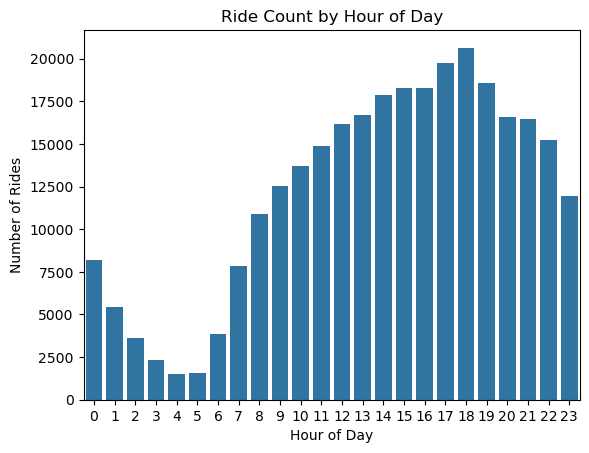

In [7]:
# Find and show the hourly trends in taxi pickups
sns.barplot(cleaned_df["hour"].value_counts(), errorbar=None)
plt.title('Ride Count by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.show()

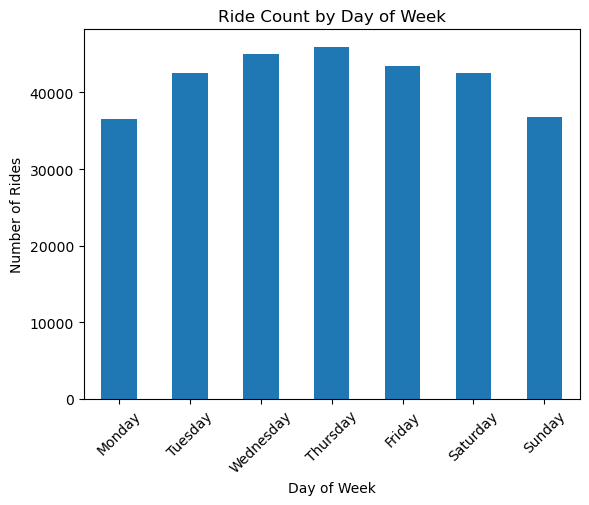

In [8]:
# Find and show the daily trends in taxi pickups (days of the week)

cleaned_df['day_of_week'] = cleaned_df['tpep_pickup_datetime'].dt.day_name()
# plt.figure(figsize=(10, 5))
cleaned_df['day_of_week'].value_counts().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).plot(kind='bar')
plt.title('Ride Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()

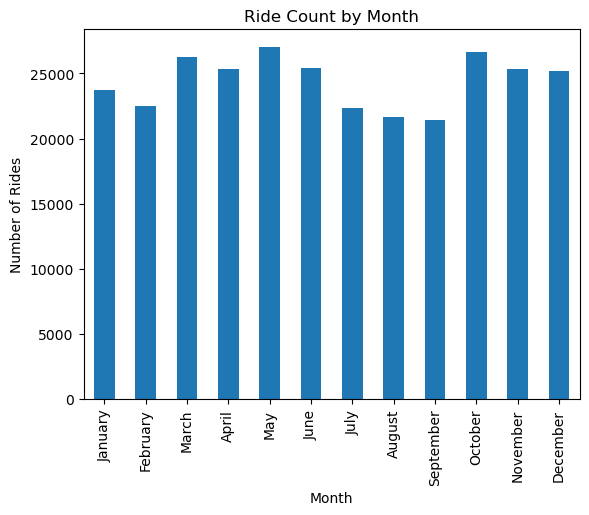

In [9]:
# Show the monthly trends in pickups

cleaned_df['month'] = cleaned_df['tpep_pickup_datetime'].dt.month_name()
cleaned_df['month'].value_counts().reindex(['January','February','March','April','May','June','July','August','September','October','November','December']).plot(kind='bar')
plt.title('Ride Count by Month')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.show()

In [13]:
analysis1 = cleaned_df[(cleaned_df['trip_distance'] == 0)]
analysis1.loc[:,['trip_distance', 'fare_amount']]

,trip_distance,fare_amount
53,0.0,50.0
75,0.0,5.0
76,0.0,45.0
121,0.0,3.0
140,0.0,55.0
...,...,...
292236,0.0,70.0
292448,0.0,15.6
292541,0.0,3.0
292689,0.0,34.5


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [14]:
# Analyse the above parameters

# final check for negative values
cols_to_check = [
    'fare_amount', 'tip_amount',
    'total_amount', 'trip_distance'
]

for col in cols_to_check:
    zero_count = (cleaned_df[col] == 0).sum()
    print(f"Zero values in '{col}': {zero_count}")


Zero values in 'fare_amount': 88
Zero values in 'tip_amount': 65640
Zero values in 'total_amount': 47
Zero values in 'trip_distance': 3521


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [15]:
# Yes, as this data will not be helpful

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [16]:
# The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?
# No, as distance is 0 it means these are short distances
analysis1 = cleaned_df[(cleaned_df['trip_distance'] == 0) & (cleaned_df['fare_amount'] > 0) &  (cleaned_df['PULocationID'] == cleaned_df['DOLocationID'])]
analysis1.loc[:,['trip_distance', 'fare_amount']]

,trip_distance,fare_amount
53,0.0,50.0
75,0.0,5.0
76,0.0,45.0
121,0.0,3.0
140,0.0,55.0
...,...,...
292236,0.0,70.0
292448,0.0,15.6
292541,0.0,3.0
292689,0.0,34.5


In [17]:
cleaned_df.shape

(292761, 23)

In [18]:
# Create a df with non zero entries for the selected parameters.
sliced1 = cleaned_df[(cleaned_df['fare_amount'] > 0) & (cleaned_df['tip_amount'] > 0) & (cleaned_df['total_amount'] > 0) & (cleaned_df['trip_distance'] > 0)]
sliced1.shape

(225863, 23)

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

month
January      517727.50
February     492310.20
March        590626.40
April        567056.31
May          630363.64
June         587013.13
July         490085.92
August       479428.96
September    506454.02
October      635870.89
November     592044.95
December     571065.45
Name: total_amount, dtype: float64


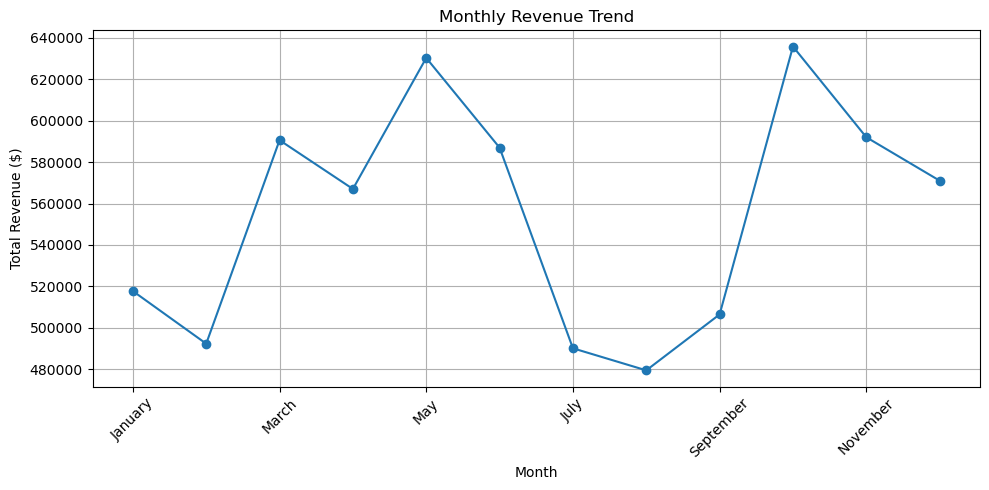

In [19]:
# Define the correct month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert month to categorical with proper ordering
sliced1['month'] = pd.Categorical(sliced1['month'], categories=month_order, ordered=True)

# Group by month and sum revenue (will maintain categorical order)
monthly_revenue = sliced1.groupby('month', observed=True)['total_amount'].sum()

# Print the revenue by month (already in correct order)
print(monthly_revenue)

# Plot with proper ordering
plt.figure(figsize=(10,5))
monthly_revenue.plot(kind='line', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [20]:
# Calculate proportion of each quarter

sliced1.loc[:,'quarter'] = sliced1['tpep_pickup_datetime'].dt.to_period('Q')

quarterly_revenue = sliced1.groupby('quarter', observed=True)['total_amount'].sum()
revenue_proportion = (quarterly_revenue / quarterly_revenue.sum()) * 100
print(revenue_proportion)

quarter
2023Q1    24.033825
2023Q2    26.793099
2023Q3    22.161538
2023Q4    27.011539
Freq: Q-DEC, Name: total_amount, dtype: float64


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

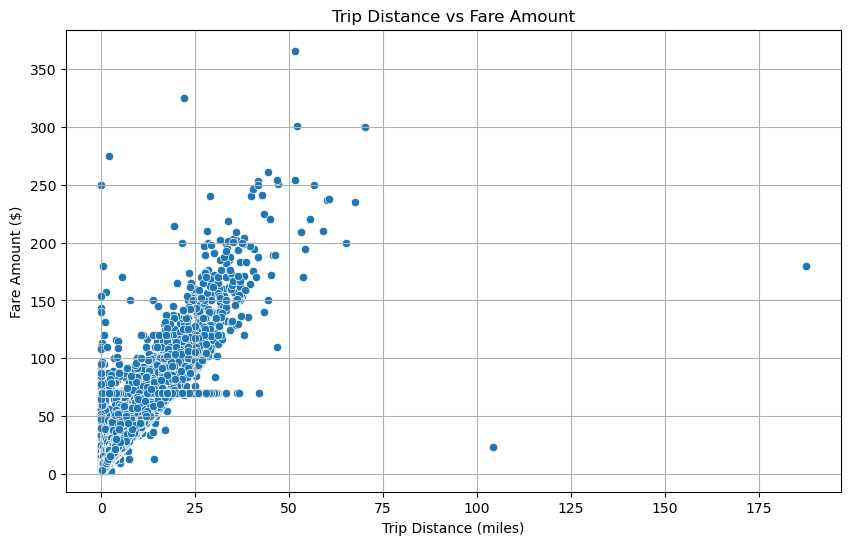

In [21]:
# Show how trip fare is affected by distance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sliced1, x='trip_distance', y='fare_amount')
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

In [22]:
# Correlation, strong correlation with increase in distance also increases the fare amount
correlation = sliced1['trip_distance'].corr(sliced1['fare_amount'])
print(f"Correlation between trip_distance and fare_amount: {correlation:.4f}")

Correlation between trip_distance and fare_amount: 0.9491


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

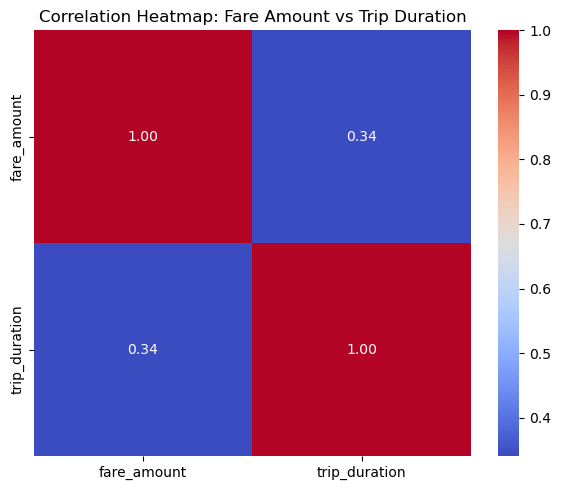

In [23]:
# Show relationship between fare and trip duration
sliced1.loc[:,'trip_duration'] = sliced1['tpep_dropoff_datetime'] - sliced1['tpep_pickup_datetime']
correlation = sliced1[['fare_amount', 'trip_duration']].corr()
# print(f"Correlation between trip duration and fare_amount: {correlation:.4f}")

# Step 4: Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Fare Amount vs Trip Duration")
plt.tight_layout()
plt.show()

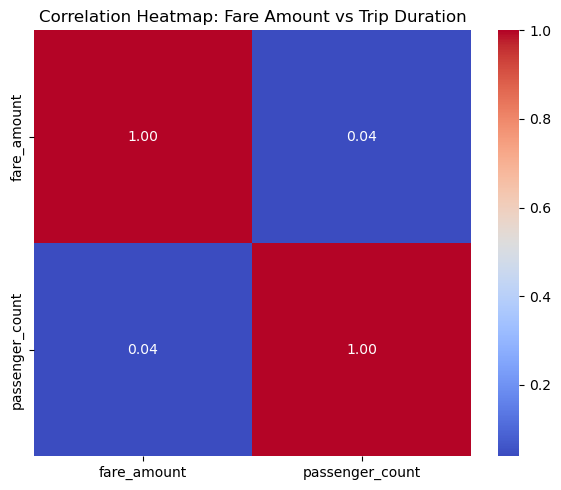

In [24]:
# Show relationship between fare and number of passengers

correlation = sliced1[['fare_amount', 'passenger_count']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Fare Amount vs Trip Duration")
plt.tight_layout()
plt.show()
# print(f"Correlation between number of passengers and fare_amount: {correlation:.4f}")

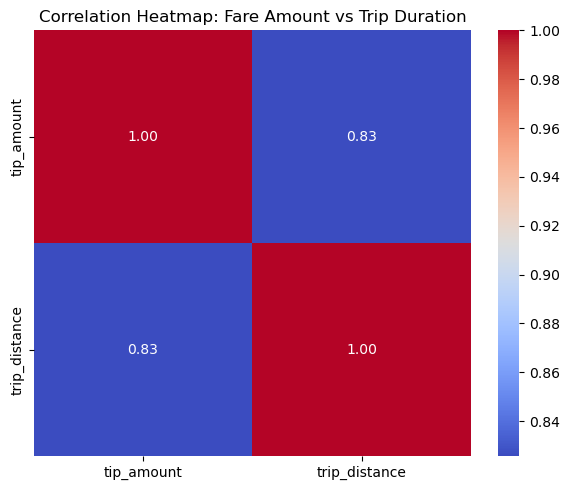

In [25]:
# Show relationship between tip and trip distance

correlation = sliced1[['tip_amount', 'trip_distance']].corr()
# print(f"Correlation between number of passengers and fare_amount: {correlation:.4f}")
plt.figure(figsize=(6, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Fare Amount vs Trip Duration")
plt.tight_layout()
plt.show()

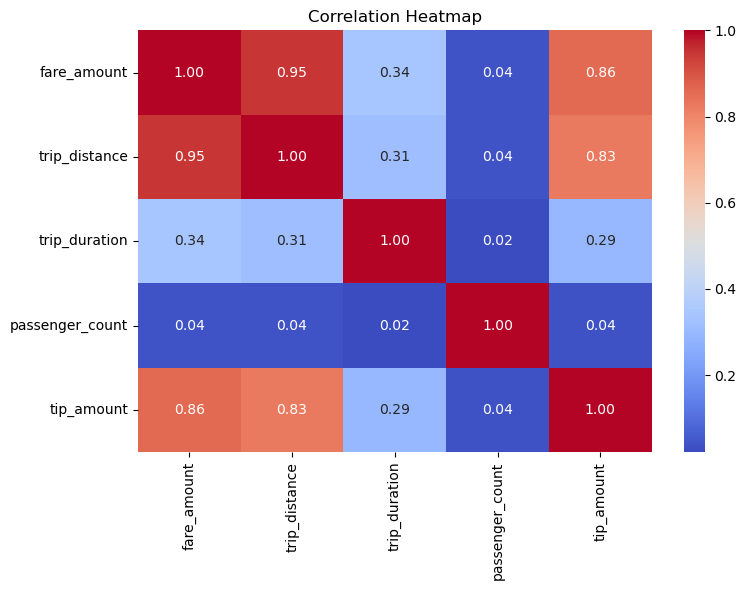

In [26]:
# Calculate correlation matrix

correlation_matrix = sliced1[['fare_amount', 'trip_distance', 'trip_duration', 'passenger_count', 'tip_amount']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [27]:
# Analyse the distribution of different payment types (payment_type).
payment_counts = sliced1['payment_type'].value_counts().sort_index()

# (Optional) Map numeric codes to readable labels if applicable
payment_labels = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}
payment_counts.index = payment_counts.index.map(payment_labels)

payment_counts

payment_type
Credit Card    225853
Cash                5
No Charge           1
Dispute             4
Name: count, dtype: int64

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



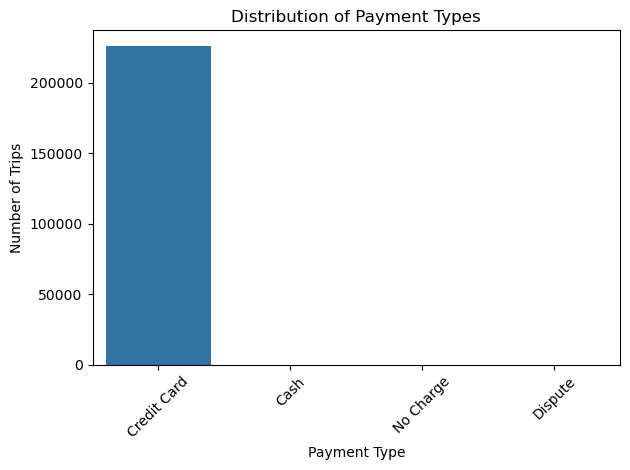

In [28]:
sns.barplot(x=payment_counts.index, y=payment_counts.values)
plt.title("Distribution of Payment Types")
plt.xlabel("Payment Type")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [29]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [30]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('../taxi_zones/taxi_zones.shp')
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

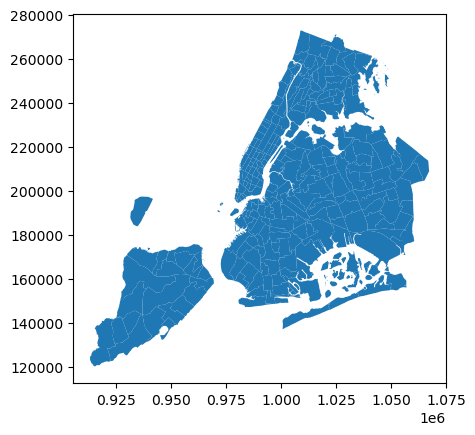

In [31]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [32]:
# Merge zones and trip records using locationID and PULocationID
merged_sliced_zones = pd.merge(sliced1, zones, how='left', left_on='PULocationID', right_on='LocationID')
# merged_df.drop(columns=['LocationID'], inplace=True)
merged_sliced_zones.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,month,quarter,trip_duration,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,January,2023Q1,0 days 00:05:05,161.0,0.035804,0.000072,Midtown Center,161.0,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21..."
1,1,2023-01-01 00:42:56,2023-01-01 01:16:33,2.0,7.10,1.0,N,246,37,1,...,January,2023Q1,0 days 00:33:37,246.0,0.069467,0.000281,West Chelsea/Hudson Yards,246.0,Manhattan,"POLYGON ((983031.177 217138.506, 983640.32 216..."
2,2,2023-01-01 00:58:00,2023-01-01 01:08:31,2.0,1.59,1.0,N,79,164,1,...,January,2023Q1,0 days 00:10:31,79.0,0.042625,0.000108,East Village,79.0,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20..."
3,2,2023-01-01 00:16:06,2023-01-01 00:31:59,1.0,3.16,1.0,N,79,256,1,...,January,2023Q1,0 days 00:15:53,79.0,0.042625,0.000108,East Village,79.0,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20..."
4,2,2023-01-01 00:44:09,2023-01-01 01:01:17,1.0,7.64,1.0,N,132,95,1,...,January,2023Q1,0 days 00:17:08,132.0,0.245479,0.002038,JFK Airport,132.0,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [33]:
# Group data by location and calculate the number of trips

pickup_counts = merged_sliced_zones.groupby('LocationID').size().reset_index(name='trip_count')
pickup_counts = pickup_counts.sort_values(by='trip_count', ascending=False)

# Show result
pickup_counts.head()


,LocationID,trip_count
140,237.0,11223
91,161.0,10707
70,132.0,10199
139,236.0,10148
92,162.0,8551


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [34]:
# Merge trip counts back to the zones GeoDataFrame
merged_zones_trips = pd.merge(zones, pickup_counts, how='left', left_on='LocationID', right_on='LocationID')

merged_zones_trips.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,trip_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",4.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",NaN
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",NaN
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",216.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",NaN


In [35]:
pd.set_option('future.no_silent_downcasting', True)
merged_zones_trips['trip_count'] = merged_zones_trips['trip_count'].fillna(0)
# merged_zones_trips['trip_count'].value_counts()
# merged_zones_trips['trip_count'].isna().sum()

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

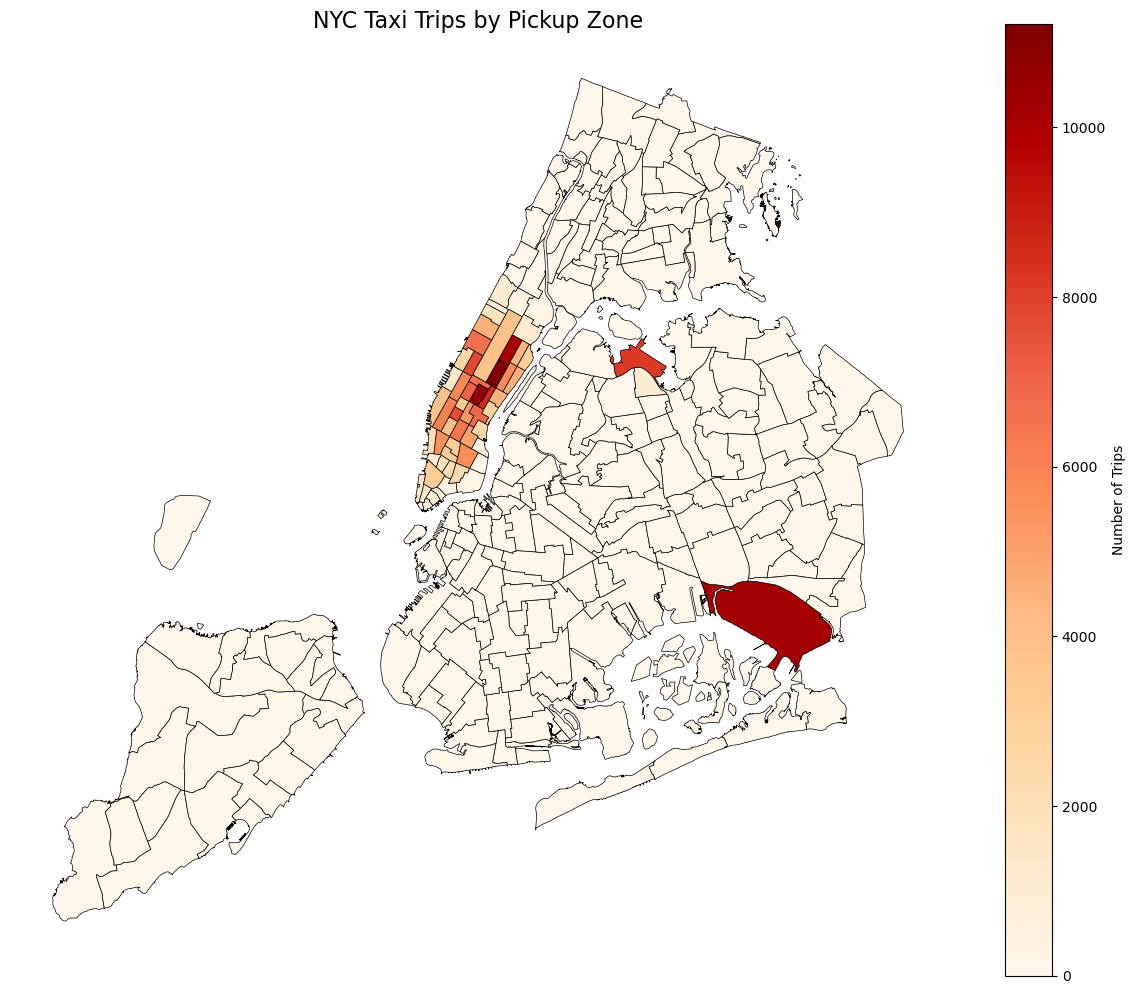

In [36]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
merged_zones_trips.plot(
    column='trip_count',              # Data to color by
    ax=ax,                            # Axis to draw on
    legend=True,                      # Show color legend
    cmap='OrRd',                      # Color palette
    legend_kwds={
        'label': "Number of Trips",
        'orientation': "vertical"
    },
    edgecolor='black',                # Outline for each zone
    linewidth=0.5                     # Border thickness
)

# Step 6: Clean up and display
ax.set_title('NYC Taxi Trips by Pickup Zone', fontsize=16)
ax.axis('off')  # Hide axes
plt.tight_layout()
plt.show()

In [37]:
# can you try displaying the zones DF sorted by the number of trips?

merged_zones_trips.sort_values(by='trip_count', ascending=False)

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,trip_count
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",11223.0
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",10707.0
131,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",10199.0
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",10148.0
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",8551.0
...,...,...,...,...,...,...,...,...
10,11,0.079211,0.000265,Bath Beach,11,Brooklyn,"POLYGON ((983945.076 158978.174, 984160.158 15...",0.0
184,185,0.086162,0.000229,Pelham Parkway,185,Bronx,"POLYGON ((1028497.128 251839.908, 1028755.865 ...",0.0
183,184,0.260816,0.001989,Pelham Bay Park,184,Bronx,"MULTIPOLYGON (((1037536.693 262105.37, 1037634...",0.0
182,183,0.039826,0.000095,Pelham Bay,183,Bronx,"POLYGON ((1029414.164 246587.728, 1029380.19 2...",0.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [38]:
# Find routes which have the slowest speeds at different times of the day

sliced1['trip_duration_min'] = (sliced1['tpep_dropoff_datetime'] - sliced1['tpep_pickup_datetime']).dt.total_seconds() / 60
sliced1['pickup_hour'] = sliced1['tpep_pickup_datetime'].dt.hour
grouped = sliced1.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])

route_stats = grouped.agg({
    'trip_duration_min': 'mean',
    'trip_distance': 'mean'
}).reset_index()


route_stats['avg_speed_mph'] = (route_stats['trip_distance'] / route_stats['trip_duration_min']) * 60


route_stats = route_stats[(route_stats['trip_duration_min'] > 0) & (route_stats['avg_speed_mph'] < 100)]

# View top slowest routes
slow_routes = route_stats.sort_values(by='avg_speed_mph').head(10)
print(slow_routes)


       PULocationID  DOLocationID  pickup_hour  trip_duration_min  \
13773           113           113           13        1426.733333   
37677           209           232           13        1431.883333   
33347           164           100           21         698.833333   
37442           209            25           22        1425.650000   
1502             41            41           16         361.245833   
44624           234           256           18        1425.250000   
32107           163            87           15          38.550000   
14114           113           181           19          35.250000   
38972           229            41           17        1428.083333   
39394           229           145           16         703.366667   

       trip_distance  avg_speed_mph  
13773         0.3900       0.016401  
37677         1.0400       0.043579  
33347         0.7900       0.067827  
37442         2.5200       0.106057  
1502          0.6775       0.112527  
44624       

In [39]:
merged_pickup_locs = pd.merge(slow_routes, zones, how='left', left_on='PULocationID', right_on='LocationID')
merged_pickup_locs = merged_pickup_locs.rename(columns={'zone': 'Pickupzone'})
merged_pickup_dropoff_locs = pd.merge(merged_pickup_locs, zones, how='left', left_on='DOLocationID', right_on='LocationID')
merged_pickup_dropoff_locs = merged_pickup_dropoff_locs.rename(columns={'zone': 'Dropoffzone'})
merged_pickup_dropoff_locs.loc[:, ["PULocationID", "Pickupzone", "DOLocationID", "Dropoffzone", "pickup_hour", "trip_duration_min",
                            "trip_distance", "avg_speed_mph"
                           ]].sort_values('avg_speed_mph', ascending=False)[0:10]

,PULocationID,Pickupzone,DOLocationID,Dropoffzone,pickup_hour,trip_duration_min,trip_distance,avg_speed_mph
9,229,Sutton Place/Turtle Bay North,145,Long Island City/Hunters Point,16,703.366667,2.3900,0.203877
8,229,Sutton Place/Turtle Bay North,41,Central Harlem,17,1428.083333,4.1600,0.174780
7,113,Greenwich Village North,181,Park Slope,19,35.250000,0.0900,0.153191
6,163,Midtown North,87,Financial District North,15,38.550000,0.0900,0.140078
5,234,Union Sq,256,Williamsburg (South Side),18,1425.250000,3.2200,0.135555
4,41,Central Harlem,41,Central Harlem,16,361.245833,0.6775,0.112527
3,209,Seaport,25,Boerum Hill,22,1425.650000,2.5200,0.106057
2,164,Midtown South,100,Garment District,21,698.833333,0.7900,0.067827
1,209,Seaport,232,Two Bridges/Seward Park,13,1431.883333,1.0400,0.043579
0,113,Greenwich Village North,113,Greenwich Village North,13,1426.733333,0.3900,0.016401


How does identifying high-traffic, high-demand routes help us?

In [40]:
# It helps us to find alternative routes

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

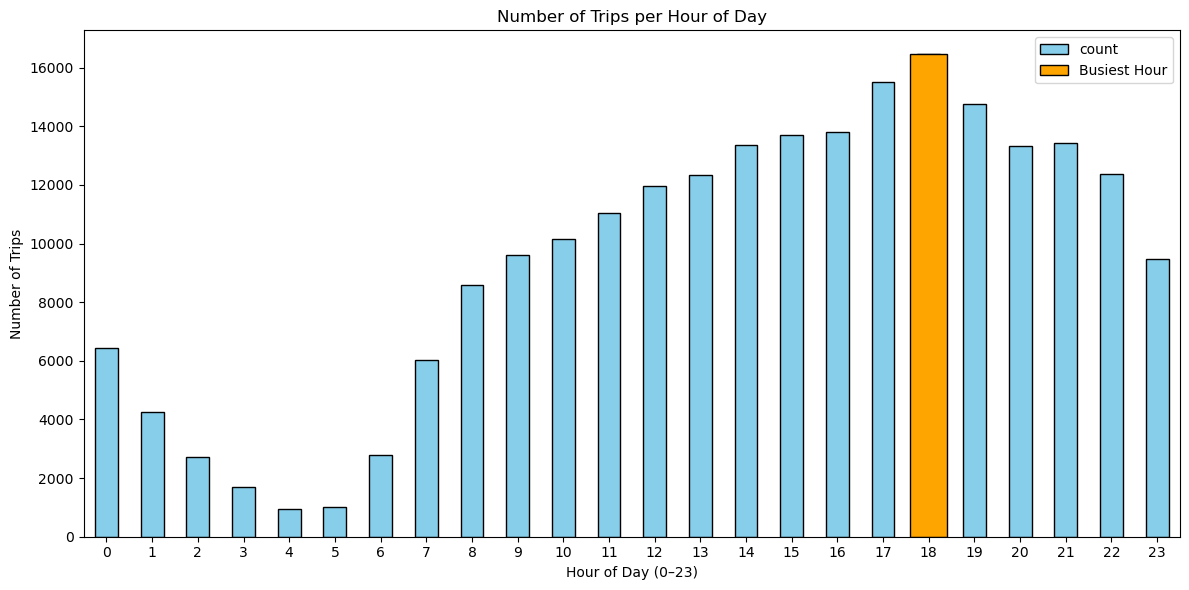

In [41]:
# Visualise the number of trips per hour and find the busiest hour

sliced1['pickup_hour'] = sliced1['tpep_pickup_datetime'].dt.hour
trips_per_hour = sliced1['pickup_hour'].value_counts().sort_index()

busiest_hour = trips_per_hour.idxmax()
busiest_count = trips_per_hour.max()

plt.figure(figsize=(12, 6))
trips_per_hour.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Trips per Hour of Day')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight busiest hour
plt.bar(busiest_hour, busiest_count, color='orange', edgecolor='black', label='Busiest Hour')
plt.legend()

plt.tight_layout()
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [42]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.008

trips_per_hour = sliced1['pickup_hour'].value_counts().sort_values(ascending=False)

top5_sample = trips_per_hour.head(5)
top5_actual = (top5_sample / sample_fraction).astype(int)


print("Estimated number of trips in the 5 busiest hours:")
print(top5_actual)

Estimated number of trips in the 5 busiest hours:
pickup_hour
18    2056750
17    1941125
19    1846750
16    1727875
15    1713375
Name: count, dtype: int32


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
['Sunday' 'Saturday']


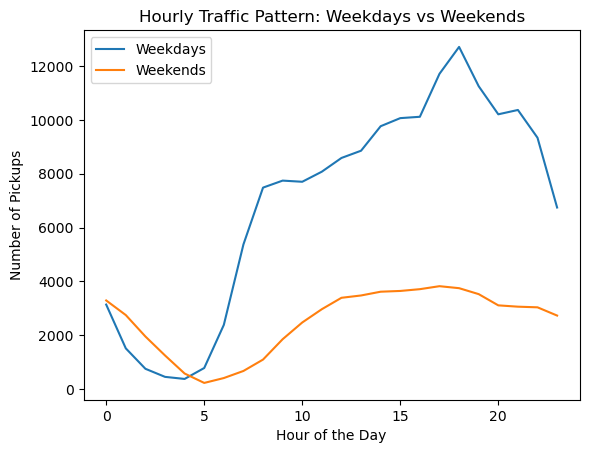

In [43]:
# Compare traffic trends for the week days and weekends

weekdays = sliced1[~(sliced1['day_of_week'].isin(['Saturday', 'Sunday']))]
print(weekdays['day_of_week'].unique())
weekends = sliced1[(sliced1['day_of_week'].isin(['Saturday', 'Sunday']))]
print(weekends['day_of_week'].unique())


weekday_traffic = weekdays.groupby(['pickup_hour']).size()
weekend_traffic = weekends.groupby(['pickup_hour']).size()

weekday_traffic.plot(kind='line', label='Weekdays', title='Hourly Traffic Pattern: Weekdays vs Weekends')
weekend_traffic.plot(kind='line', label='Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.legend()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [44]:
# Find top 10 pickup and dropoff zones
pickup_locs = sliced1.groupby(['PULocationID', 'pickup_hour']).size().reset_index(name='counts')
pickup_locs.sort_values('counts', ascending=False)[0:10]

# merged_pickup_locs = pd.merge(pickup_locs, zones, how='left', left_on='PULocationID', right_on='LocationID')
# merged_pickup_locs.loc[:, ["PULocationID", "zone" "pickup_hour", "counts"]]

,PULocationID,pickup_hour,counts
1242,161,18,977
1241,161,17,965
1809,237,17,857
1783,236,15,848
1807,237,15,843
1806,237,14,838
1243,161,19,834
1810,237,18,829
1808,237,16,821
1785,236,17,795


In [53]:
merged_pickup_locs = pd.merge(pickup_locs, zones, how='left', left_on='PULocationID', right_on='LocationID')
plot_pickups = merged_pickup_locs.loc[:, ["PULocationID", "zone", "pickup_hour", "counts"]].sort_values('counts', ascending=False)[0:10]
plot_pickups

,PULocationID,zone,pickup_hour,counts
1246,161,Midtown Center,18,977
1245,161,Midtown Center,17,965
1813,237,Upper East Side South,17,857
1787,236,Upper East Side North,15,848
1811,237,Upper East Side South,15,843
1810,237,Upper East Side South,14,838
1247,161,Midtown Center,19,834
1814,237,Upper East Side South,18,829
1812,237,Upper East Side South,16,821
1789,236,Upper East Side North,17,795


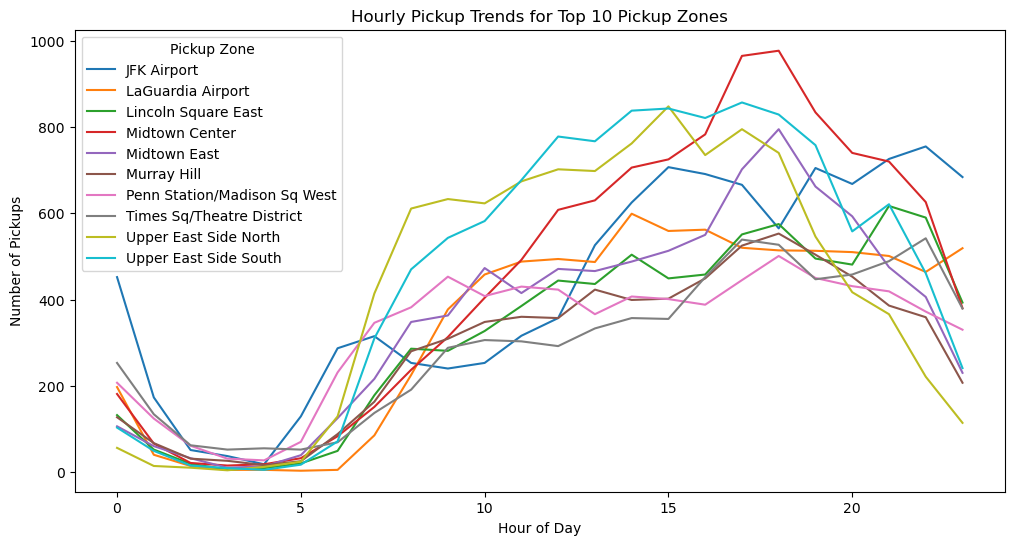

In [55]:
# Top 10 pickup zones overall
top_pickup_zones = sliced1['PULocationID'].value_counts().head(10).index
pickup_trends = pickup_locs[pickup_locs['PULocationID'].isin(top_pickup_zones)]
pickup_trends = pd.merge(pickup_trends, zones, how='left', left_on='PULocationID', right_on='LocationID')

plt.figure(figsize=(12,6))
sns.lineplot(data=pickup_trends, x='pickup_hour', y='counts', hue='zone')
plt.title('Hourly Pickup Trends for Top 10 Pickup Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.legend(title='Pickup Zone')
plt.show()


In [46]:
dropoff_locs = sliced1.groupby(['DOLocationID', 'pickup_hour']).size().reset_index(name='counts')
dropoff_locs.sort_values('counts', ascending=False)[0:10]

,DOLocationID,pickup_hour,counts
3401,236,18,819
3400,236,17,806
3399,236,16,798
3398,236,15,796
3397,236,14,794
3425,237,18,793
3424,237,17,767
2288,161,8,763
3419,237,12,754
3422,237,15,734


In [56]:
merged_dropoff_locs = pd.merge(dropoff_locs, zones, how='left', left_on='DOLocationID', right_on='LocationID')
plot_dropoffs = merged_dropoff_locs.loc[:, ["DOLocationID", "zone", "pickup_hour", "counts"]].sort_values('counts', ascending=False)[0:10]
plot_dropoffs

,DOLocationID,zone,pickup_hour,counts
3416,236,Upper East Side North,18,819
3415,236,Upper East Side North,17,806
3414,236,Upper East Side North,16,798
3413,236,Upper East Side North,15,796
3412,236,Upper East Side North,14,794
3440,237,Upper East Side South,18,793
3439,237,Upper East Side South,17,767
2303,161,Midtown Center,8,763
3434,237,Upper East Side South,12,754
3437,237,Upper East Side South,15,734


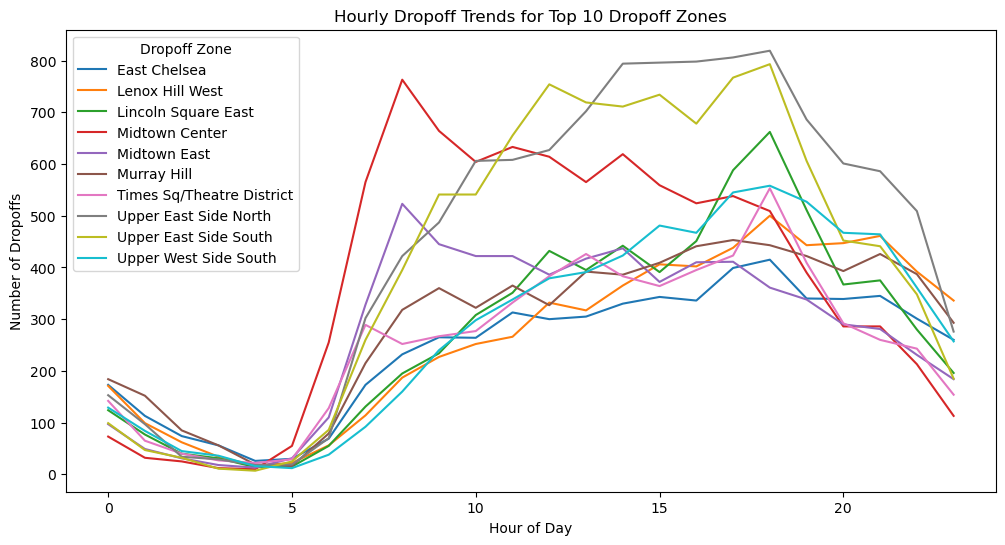

In [57]:
# Top 10 dropoff zones overall
top_dropoff_zones = sliced1['DOLocationID'].value_counts().head(10).index
dropoff_trends = dropoff_locs[dropoff_locs['DOLocationID'].isin(top_dropoff_zones)]
dropoff_trends = pd.merge(dropoff_trends, zones, how='left', left_on='DOLocationID', right_on='LocationID')

plt.figure(figsize=(12,6))
sns.lineplot(data=dropoff_trends, x='pickup_hour', y='counts', hue='zone')
plt.title('Hourly Dropoff Trends for Top 10 Dropoff Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Dropoffs')
plt.legend(title='Dropoff Zone')
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [49]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Step 1: Count pickups and dropoffs
pickup_counts = sliced1.groupby('PULocationID').size().reset_index(name='pickup_count')
dropoff_counts = sliced1.groupby('DOLocationID').size().reset_index(name='dropoff_count')

# Step 2: Merge pickup and dropoff counts
zone_ratios = pd.merge(pickup_counts, dropoff_counts, left_on='PULocationID', right_on='DOLocationID', how='outer')

# Step 3: Handle missing values
zone_ratios['pickup_count'] = zone_ratios['pickup_count'].fillna(0)
zone_ratios['dropoff_count'] = zone_ratios['dropoff_count'].fillna(0)

# Step 4: Create unified zone_id column
zone_ratios['zone_id'] = zone_ratios['PULocationID'].combine_first(zone_ratios['DOLocationID'])

# Step 5: Compute pickup/dropoff ratio
zone_ratios['pickup_dropoff_ratio'] = zone_ratios['pickup_count'] / (zone_ratios['dropoff_count'] + 1e-6)

# Step 6: Merge with zone names
zone_ratios = pd.merge(zone_ratios, zones, left_on='zone_id', right_on='LocationID', how='left')

# Step 7: Get top and bottom 10 by ratio
top10 = zone_ratios.sort_values('pickup_dropoff_ratio', ascending=False).head(10)
bottom10 = zone_ratios.sort_values('pickup_dropoff_ratio').head(10)

# Step 8: Display
print("Top 10 Pickup/Dropoff Ratios by Zone:")
top10[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']]


Top 10 Pickup/Dropoff Ratios by Zone:


,zone,pickup_count,dropoff_count,pickup_dropoff_ratio
65,East Elmhurst,1043.0,72,14.486111
120,JFK Airport,10199.0,2123,4.804051
126,LaGuardia Airport,8144.0,2814,2.894101
198,South Jamaica,23.0,14,1.642857
172,Penn Station/Madison Sq West,7703.0,4810,1.601455
40,Central Park,3899.0,2802,1.391506
232,West Village,5487.0,4018,1.365605
103,Greenwich Village South,3087.0,2312,1.335208
149,Midtown East,8551.0,6607,1.294233
93,Garment District,3395.0,2781,1.220784


In [303]:
print("\nBottom 10 Pickup/Dropoff Ratios by Zone:")
bottom10[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']]


Bottom 10 Pickup/Dropoff Ratios by Zone:


,zone,pickup_count,dropoff_count,pickup_dropoff_ratio
114,Hunts Point,0.0,4,0.0
64,East Concourse/Concourse Village,0.0,25,0.0
171,Pelham Parkway,0.0,16,0.0
62,Dyker Heights,0.0,12,0.0
94,Glen Oaks,0.0,4,0.0
141,Marble Hill,0.0,1,0.0
59,Douglaston,0.0,15,0.0
58,Cypress Hills,0.0,23,0.0
177,Queensboro Hill,0.0,12,0.0
170,Pelham Bay Park,0.0,1,0.0


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [304]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_hours = [23, 0, 1, 2, 3, 4, 5]
night_data = sliced1[sliced1['pickup_hour'].isin(night_hours)]


night_pickups = (
    night_data.groupby('PULocationID')
    .size()
    .reset_index(name='night_pickup_count')
)

night_dropoffs = (
    night_data.groupby('DOLocationID')
    .size()
    .reset_index(name='night_dropoff_count')
)

night_traffic = pd.merge(
    night_pickups, night_dropoffs,
    left_on='PULocationID', right_on='DOLocationID',
    how='outer'
)

night_traffic['zone_id'] = night_traffic['PULocationID'].fillna(night_traffic['DOLocationID'])
night_traffic['night_pickup_count'] = night_traffic['night_pickup_count'].fillna(0)
night_traffic['night_dropoff_count'] = night_traffic['night_dropoff_count'].fillna(0)

night_traffic['total_night_traffic'] = night_traffic['night_pickup_count'] + night_traffic['night_dropoff_count']

night_traffic = pd.merge(night_traffic, zones, left_on='zone_id', right_on='LocationID', how='left')

top_night_zones = night_traffic.sort_values('total_night_traffic', ascending=False).head(10)

print("Top 10 Zones with Highest Nighttime Traffic (11PM–5AM):")
top_night_zones[['zone', 'night_pickup_count', 'night_dropoff_count', 'total_night_traffic']]


Top 10 Zones with Highest Nighttime Traffic (11PM–5AM):


,zone,night_pickup_count,night_dropoff_count,total_night_traffic
65,East Village,2074.0,1090.0,3164.0
208,West Village,1715.0,644.0,2359.0
38,Clinton East,1261.0,850.0,2111.0
122,Lower East Side,1292.0,579.0,1871.0
107,JFK Airport,1544.0,181.0,1725.0
88,Gramercy,752.0,765.0,1517.0
56,East Chelsea,740.0,732.0,1472.0
190,Times Sq/Theatre District,987.0,479.0,1466.0
92,Greenwich Village South,1109.0,341.0,1450.0
141,Murray Hill,499.0,805.0,1304.0


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [217]:
# Filter for night hours (11 PM to 5 AM)

night_hours = [23, 0, 1, 2, 3, 4, 5]
day_hours = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

# Filter nighttime and daytime data
nighttime_data = sliced1[sliced1['pickup_hour'].isin(night_hours)]
daytime_data = sliced1[sliced1['pickup_hour'].isin(day_hours)]



nighttime_revenue = nighttime_data['total_amount'].sum()
daytime_revenue = daytime_data['total_amount'].sum()


total_revenue = nighttime_revenue + daytime_revenue

nighttime_share = nighttime_revenue / total_revenue * 100
daytime_share = daytime_revenue / total_revenue * 100

print(f"Nighttime Revenue Share: {nighttime_share:.2f}%")
print(f"Daytime Revenue Share: {daytime_share:.2f}%")


Nighttime Revenue Share: 11.96%
Daytime Revenue Share: 88.04%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [218]:
# Analyse the fare per mile per passenger for different passenger counts

sliced1['fare_per_mile'] = sliced1['fare_amount'] / sliced1['trip_distance']
sliced1['fare_per_mile_per_passenger'] = sliced1['fare_per_mile'] / sliced1['passenger_count']

average_fare_per_passenger = sliced1.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

print(average_fare_per_passenger)



   passenger_count  fare_per_mile_per_passenger
0              1.0                     9.005900
1              2.0                     5.519112
2              3.0                     3.640453
3              4.0                     3.411557
4              5.0                     1.511769
5              6.0                     1.272553


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [305]:
# Compare the average fare per mile for different days and for different times of the day

# Step 1: Calculate the fare per mile for each trip
sliced1['fare_per_mile'] = sliced1['fare_amount'] / sliced1['trip_distance']

# Step 2: Calculate the average fare per mile by hour of the day
average_fare_by_hour = sliced1.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()

# Step 3: Calculate the average fare per mile by day of the week
average_fare_by_day = sliced1.groupby('day_of_week')['fare_per_mile'].mean().reset_index()

# Step 4: Display the results
print("Average Fare per Mile by Hour of the Day:")
average_fare_by_hour

Average Fare per Mile by Hour of the Day:


,pickup_hour,fare_per_mile
0,0,8.203569
1,1,9.469329
2,2,7.118360
3,3,7.681090
4,4,22.432357
5,5,11.851857
6,6,13.771515
7,7,7.191759
8,8,8.463444
9,9,8.583771


In [306]:
print("\nAverage Fare per Mile by Day of the Week:")
average_fare_by_day


Average Fare per Mile by Day of the Week:


,day_of_week,fare_per_mile
0,Friday,8.732178
1,Monday,8.417190
2,Saturday,9.347328
3,Sunday,10.186626
4,Thursday,10.904930
5,Tuesday,9.496100
6,Wednesday,8.758707


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [308]:
# Compare fare per mile for different vendors
sliced1['fare_per_mile'] = sliced1['fare_amount'] / sliced1['trip_distance']
average_fare_by_vendor_hour = sliced1.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().reset_index()

print("Average Fare per Mile by Vendor and Hour of the Day:")
print(average_fare_by_vendor_hour)


Average Fare per Mile by Vendor and Hour of the Day:
    VendorID  pickup_hour  fare_per_mile
0          1            0       6.442728
1          1            1       6.482393
2          1            2       6.451775
3          1            3       6.269806
4          1            4       6.293682
5          1            5       6.852921
6          1            6       6.324118
7          1            7       6.991054
8          1            8       8.009076
9          1            9       8.011939
10         1           10       8.050047
11         1           11       8.420010
12         1           12       8.598629
13         1           13       8.262844
14         1           14       8.678087
15         1           15       8.525029
16         1           16       8.401183
17         1           17       8.386591
18         1           18       8.425798
19         1           19       7.811397
20         1           20       7.171665
21         1           21       7.084760
22  

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [309]:
# Defining distance tiers


sliced1['fare_per_mile'] = sliced1['fare_amount'] / sliced1['trip_distance']


conditions = [
    (sliced1['trip_distance'] <= 2),          # Distance <= 2 miles
    (sliced1['trip_distance'] > 2) & (sliced1['trip_distance'] <= 5),  # 2 < Distance <= 5 miles
    (sliced1['trip_distance'] > 5)             # Distance > 5 miles
]

# Labels for each range
labels = ['Up to 2 miles', '2 to 5 miles', 'Above 5 miles']

# Create the distance range column
sliced1['distance_range'] = pd.cut(sliced1['trip_distance'], bins=[0, 2, 5, float('inf')], labels=labels)

# Step 3: Group by Vendor and Distance Range to calculate the average fare per mile
average_fare_by_vendor_range = sliced1.groupby(['VendorID', 'distance_range'])['fare_per_mile'].mean().reset_index()

# Step 4: Display the results
print("Average Fare per Mile by Vendor and Distance Range:")
print(average_fare_by_vendor_range)


Average Fare per Mile by Vendor and Distance Range:
   VendorID distance_range  fare_per_mile
0         1  Up to 2 miles       9.409998
1         1   2 to 5 miles       6.359586
2         1  Above 5 miles       4.455716
3         2  Up to 2 miles      13.485444
4         2   2 to 5 miles       6.539651
5         2  Above 5 miles       4.503751


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [310]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

sliced1['tip_percentage'] = (sliced1['tip_amount'] / sliced1['fare_amount']) * 100


conditions = [
    (sliced1['trip_distance'] <= 2),          # Distance <= 2 miles
    (sliced1['trip_distance'] > 2) & (sliced1['trip_distance'] <= 5),  # 2 < Distance <= 5 miles
    (sliced1['trip_distance'] > 5)             # Distance > 5 miles
]

labels = ['Up to 2 miles', '2 to 5 miles', 'Above 5 miles']

sliced1['distance_range'] = pd.cut(sliced1['trip_distance'], bins=[0, 2, 5, float('inf')], labels=labels)


average_tip_by_distance = sliced1.groupby('distance_range')['tip_percentage'].mean().reset_index()
average_tip_by_passenger_count = sliced1.groupby('passenger_count')['tip_percentage'].mean().reset_index()
average_tip_by_pickup_hour = sliced1.groupby('pickup_hour')['tip_percentage'].mean().reset_index()


print("Average Tip Percentage by Distance Range:")
print(average_tip_by_distance)

Average Tip Percentage by Distance Range:
  distance_range  tip_percentage
0  Up to 2 miles       28.499416
1   2 to 5 miles       22.999048
2  Above 5 miles       21.962930


In [311]:
print("\nAverage Tip Percentage by Passenger Count:")
print(average_tip_by_passenger_count)


Average Tip Percentage by Passenger Count:
   passenger_count  tip_percentage
0              1.0       25.939603
1              2.0       25.544078
2              3.0       25.603503
3              4.0       25.598026
4              5.0       26.038132
5              6.0       25.930186


In [312]:
print("\nAverage Tip Percentage by Pickup Hour:")
print(average_tip_by_pickup_hour)


Average Tip Percentage by Pickup Hour:
    pickup_hour  tip_percentage
0             0       25.429546
1             1       25.919045
2             2       25.860245
3             3       25.937995
4             4       25.515856
5             5       25.434024
6             6       25.003614
7             7       24.794154
8             8       24.845981
9             9       25.036653
10           10       25.374359
11           11       25.221968
12           12       25.201899
13           13       25.087920
14           14       24.919113
15           15       24.733242
16           16       27.096108
17           17       27.164846
18           18       27.389039
19           19       27.393391
20           20       26.119766
21           21       26.126442
22           22       25.788168
23           23       25.408875


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [223]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

sliced1['tip_percentage'] = (sliced1['tip_amount'] / sliced1['fare_amount']) * 100


low_tip_trips = sliced1[sliced1['tip_percentage'] < 10]
high_tip_trips = sliced1[sliced1['tip_percentage'] > 25]


low_tip_avg_distance = low_tip_trips['trip_distance'].mean()
high_tip_avg_distance = high_tip_trips['trip_distance'].mean()


low_tip_avg_passenger_count = low_tip_trips['passenger_count'].mean()
high_tip_avg_passenger_count = high_tip_trips['passenger_count'].mean()


low_tip_avg_pickup_hour = low_tip_trips['pickup_hour'].mean()
high_tip_avg_pickup_hour = high_tip_trips['pickup_hour'].mean()


low_tip_avg_fare = low_tip_trips['fare_amount'].mean()
high_tip_avg_fare = high_tip_trips['fare_amount'].mean()


print("Comparison of Trips with Low Tip Percentage (< 10%) vs. High Tip Percentage (> 25%)")

print("\nAverage Trip Distance:")
print(f"Low Tip Trips: {low_tip_avg_distance:.2f} miles")
print(f"High Tip Trips: {high_tip_avg_distance:.2f} miles")

print("\nAverage Passenger Count:")
print(f"Low Tip Trips: {low_tip_avg_passenger_count:.2f} passengers")
print(f"High Tip Trips: {high_tip_avg_passenger_count:.2f} passengers")

print("\nAverage Pickup Hour:")
print(f"Low Tip Trips: {low_tip_avg_pickup_hour:.2f} hour")
print(f"High Tip Trips: {high_tip_avg_pickup_hour:.2f} hour")

print("\nAverage Fare Amount:")
print(f"Low Tip Trips: ${low_tip_avg_fare:.2f}")
print(f"High Tip Trips: ${high_tip_avg_fare:.2f}")


Comparison of Trips with Low Tip Percentage (< 10%) vs. High Tip Percentage (> 25%)

Average Trip Distance:
Low Tip Trips: 4.84 miles
High Tip Trips: 2.29 miles

Average Passenger Count:
Low Tip Trips: 1.37 passengers
High Tip Trips: 1.36 passengers

Average Pickup Hour:
Low Tip Trips: 14.05 hour
High Tip Trips: 14.62 hour

Average Fare Amount:
Low Tip Trips: $26.03
High Tip Trips: $14.37


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [224]:
# See how passenger count varies across hours and days

# Create the pivot table
passenger_pivot = sliced1.pivot_table(
    index='day_of_week',
    columns='pickup_hour',
    values='passenger_count',
    aggfunc='mean'
)

# Display the pivot table
print(passenger_pivot)



pickup_hour        0         1         2         3         4         5   \
day_of_week                                                               
Friday       1.362934  1.347594  1.437086  1.433962  1.324324  1.322785   
Monday       1.334091  1.452830  1.396226  1.481013  1.478261  1.326087   
Saturday     1.454827  1.480696  1.484631  1.439236  1.293893  1.340659   
Sunday       1.431384  1.495098  1.397751  1.455490  1.441640  1.395683   
Thursday     1.338068  1.414706  1.326531  1.395833  1.321429  1.260116   
Tuesday      1.424870  1.420382  1.303797  1.440000  1.300000  1.384146   
Wednesday    1.378709  1.444444  1.413223  1.394366  1.437500  1.251656   

pickup_hour        6         7         8         9   ...        14        15  \
day_of_week                                          ...                       
Friday       1.321429  1.306538  1.261963  1.312824  ...  1.375000  1.406855   
Monday       1.230947  1.237540  1.243137  1.288690  ...  1.358277  1.388644   
Satu

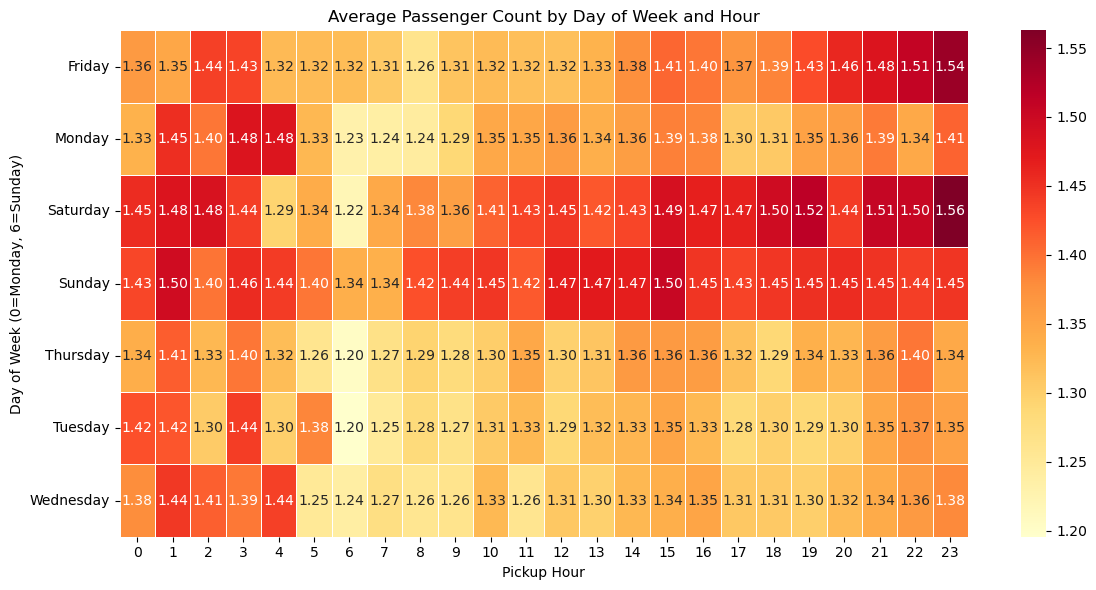

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(passenger_pivot, annot=True, fmt=".2f", cmap="YlOrRd", linewidths=.5)
plt.title('Average Passenger Count by Day of Week and Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Day of Week (0=Monday, 6=Sunday)')
plt.tight_layout()
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [226]:
# How does passenger count vary across zones

sliced_with_zones = sliced1.merge(zones, how='left', left_on='PULocationID', right_on='LocationID')

zone_passenger_counts = sliced_with_zones.groupby('zone')['passenger_count'].mean().reset_index()
zone_passenger_counts_sorted = zone_passenger_counts.sort_values(by='passenger_count', ascending=False)

print(zone_passenger_counts_sorted.head(10))



                        zone  passenger_count
23        Claremont/Bathgate         5.000000
100          Oakland Gardens         3.500000
1    Arrochar/Fort Wadsworth         3.000000
89            Middle Village         2.500000
31                    Corona         2.400000
132         Sunset Park West         2.333333
99            Newark Airport         2.250000
86                   Maspeth         2.083333
83           Manhattan Beach         2.000000
61           Highbridge Park         2.000000


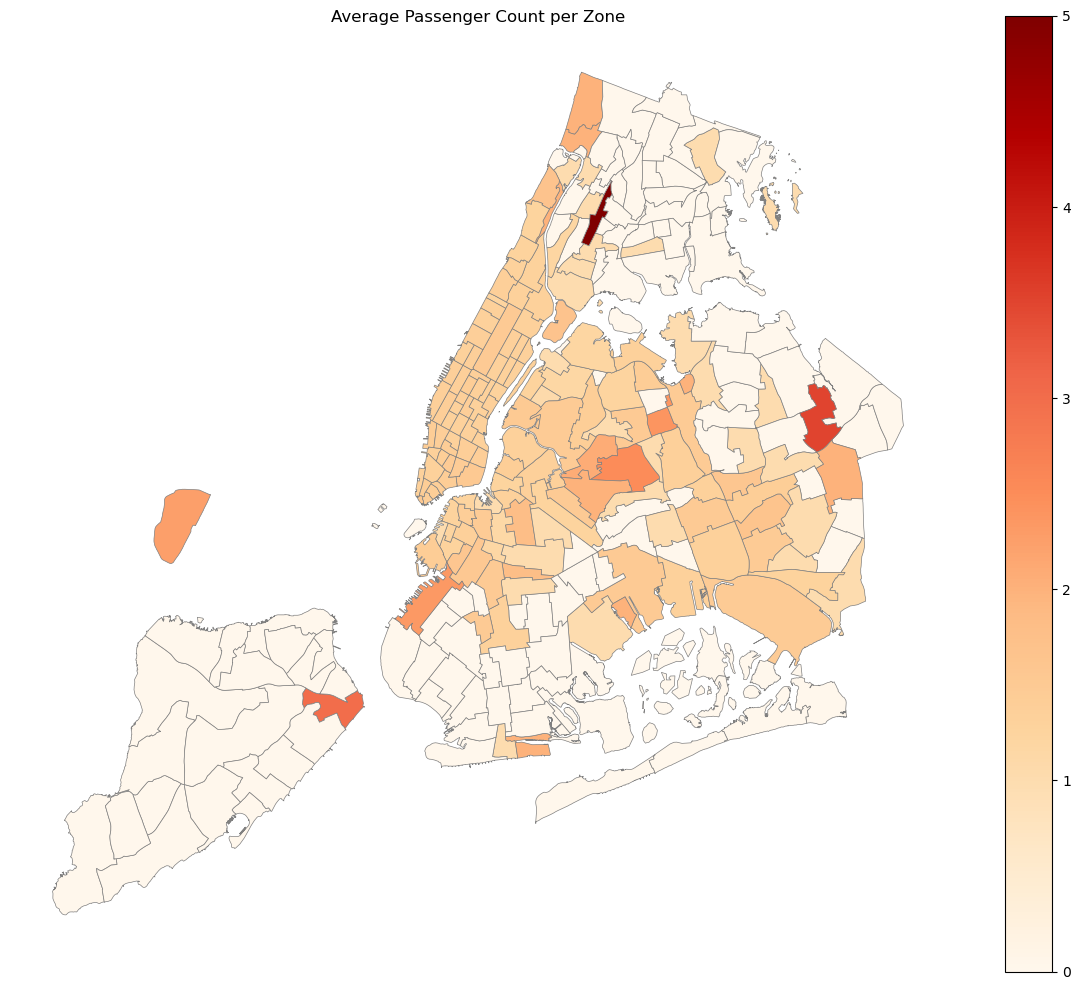

In [227]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.


avg_passenger_counts = sliced1.groupby('PULocationID')['passenger_count'].mean().reset_index()
merged_zones_trips = zones.merge(avg_passenger_counts, how='left', left_on='LocationID', right_on='PULocationID')
merged_zones_trips['passenger_count'].fillna(0, inplace=True)

fig, ax = plt.subplots(figsize=(12, 10))
merged_zones_trips.plot(
    column='passenger_count',
    cmap='OrRd',
    legend=True,
    linewidth=0.5,
    edgecolor='gray',
    ax=ax
)
ax.set_title('Average Passenger Count per Zone')
plt.axis('off')
plt.tight_layout()
plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

In [228]:
# Function to show how often each fee is applied (non-zero values)
def get_charge_prevalence(df, column):
    # counts = df[column].value_counts().sort_index()
    # percent = (counts / len(df)) * 100
    # return pd.DataFrame({'Count': counts, 'Percent': percent.round(2)})
    extra_applied = (sliced1[column] > 0).mean() * 100
    return f"Percentage of trips with an {column} charge: {extra_applied:.2f}%"

# Analyze each
print("Extra:")
print(get_charge_prevalence(sliced1, 'extra'))

print("\nMTA Tax:")
print(get_charge_prevalence(sliced1, 'mta_tax'))

print("\nImprovement Surcharge:")
print(get_charge_prevalence(sliced1, 'improvement_surcharge'))

print("\nTolls:")
print(get_charge_prevalence(sliced1, 'tolls_amount'))

print("\nCongestion Surcharge:")
print(get_charge_prevalence(sliced1, 'congestion_surcharge'))

print("\nAirport Fee:")
print(get_charge_prevalence(sliced1, 'airport_fee'))


Extra:
Percentage of trips with an extra charge: 63.45%

MTA Tax:
Percentage of trips with an mta_tax charge: 99.46%

Improvement Surcharge:
Percentage of trips with an improvement_surcharge charge: 100.00%

Tolls:
Percentage of trips with an tolls_amount charge: 8.04%

Congestion Surcharge:
Percentage of trips with an congestion_surcharge charge: 94.97%

Airport Fee:
Percentage of trips with an airport_fee charge: 8.20%


**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [229]:
# How often is each surcharge applied?

# pickup zone
pickup_with_zone = sliced1.merge(zones, how='left', left_on='PULocationID', right_on='LocationID')

zone_extra_stats = pickup_with_zone.groupby('zone').agg(
    total_count=('extra', 'count'),
    extra_applied_count=('extra', lambda x: (x > 0).sum())
).reset_index()

zone_extra_stats['percent_with_extra'] = (zone_extra_stats['extra_applied_count'] / zone_extra_stats['total_count']) * 100
zone_extra_stats = zone_extra_stats.sort_values(by='extra_applied_count', ascending=False)

zone_extra_stats.head()

,zone,total_count,extra_applied_count,percent_with_extra
74,LaGuardia Airport,8144,8062,98.993124
90,Midtown Center,10707,7122,66.517232
140,Upper East Side South,11223,6440,57.382162
91,Midtown East,8551,5399,63.138814
139,Upper East Side North,10148,5375,52.966102


In [230]:
# dropoff zone

dropoff_with_zone = sliced1.merge(zones, how='left', left_on='DOLocationID', right_on='LocationID')

dropoff_zone_extra_stats = dropoff_with_zone.groupby('zone').agg(
    total_count=('extra', 'count'),
    extra_applied_count=('extra', lambda x: (x > 0).sum())
).reset_index()

dropoff_zone_extra_stats['percent_with_extra'] = (dropoff_zone_extra_stats['extra_applied_count'] / dropoff_zone_extra_stats['total_count']) * 100
dropoff_zone_extra_stats = dropoff_zone_extra_stats.sort_values(by='extra_applied_count', ascending=False)

dropoff_zone_extra_stats.head()


,zone,total_count,extra_applied_count,percent_with_extra
218,Upper East Side North,10845,6481,59.760258
219,Upper East Side South,9887,5500,55.628603
146,Midtown Center,8907,4415,49.567756
221,Upper West Side South,6808,4390,64.482961
155,Murray Hill,6943,4359,62.782659


In [231]:
#pickup hour
extra_by_hour = pickup_with_zone.groupby('pickup_hour').agg(
    total_count=('extra', 'count'),
    extra_applied_count=('extra', lambda x: (x > 0).sum())
).reset_index()

extra_by_hour['percent_with_extra'] = (extra_by_hour['extra_applied_count'] / extra_by_hour['total_count']) * 100
extra_by_hour_sorted = extra_by_hour.sort_values(by='percent_with_extra', ascending=False)

extra_by_hour_sorted.head()

,pickup_hour,total_count,extra_applied_count,percent_with_extra
2,2,2709,2681,98.966408
3,3,1705,1675,98.240469
1,1,4262,4169,97.817926
21,21,13427,13034,97.073062
22,22,12373,11958,96.645923


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

### Optimize Routing & Dispatching Based on Demand Patterns

#### Key Insights:

**Peak Demand Hours**:  
- Morning Rush: 7–9 AM  
- Evening Rush: 5–7 PM  
- Lowest Activity: 12–4 AM  

**Weekly Trends**:  
- High demand on weekdays, especially Wednesday to Friday  
- Evenings & nights on weekends show spikes (linked to social activity)  

**Monthly/Quarterly Trends**:  
- September–November: Highest trip volumes and revenues  
- Q4 (Oct–Dec): 27.01% of annual revenue (peak quarter)  
- Summer months (July–August) show notable dips  

---

#### Recommended Actions:

**Time-Aware Dispatching**:  
Scale up driver availability during rush hours and evening peaks.  

**Slow Route Avoidance**:  
Use historical route-speed data to reroute around bottlenecks.  

**Quarterly Adjustments**:  
Expand fleet and coverage in Q4.  
Offer driver incentives during low-earning quarters like Q3.  

**Predictive Analytics Integration**:  
Feed this temporal demand data into dispatch models to anticipate spikes and pre-allocate resources.  

---

### Optimization Strategies:

**Dynamic Routing**:  
Deploy intelligent route planning using historical average speeds. Avoid the slowest routes during peak hours and suggest alternatives using live traffic overlays.

**Time-Aware Dispatching**:  
During rush hours, prioritize short, quick trips to maximize turnover.  
During off-peak hours, target longer-distance rides with potentially higher revenue per trip.

**Demand Forecasting**:  
Integrate hourly/weekly/monthly demand data into dispatch algorithms to pre-position vehicles before demand spikes (e.g., near Midtown from 4–6 PM on weekdays).


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

### Insights from Temporal-Zonal Analysis:
**Top Pickup Zones**: LaGuardia Airport, Midtown Center, and Upper East Side(north and south), Midtown East

**Top Dropoff Zones**: Upper East Side(north and south), Midtown Center, Upper West Side South, Murray Hill

**Night Hour Traffic Zones (11 PM–5 AM)**: Significant activity persists, especially around nightlife districts.

---

### Recommendations:
#### **Zone-Based Allocation**:

**Airport Strategy**: Maintain higher cab availability around LaGuardia and JFK during peak arrival hours (typically early morning and late evening).

**Midtown & UES**: Position more cabs here between 3 PM–8 PM, matching both end-of-workday and early evening demand.

---

#### **Time-Zone Heatmaps**:
Use trip data to maintain a live map of high-traffic zones by hour.

---

#### **Night Strategy**:

Focus late-night deployments (11 PM–3 AM) in zones like East Village, Midtown, and Uptown nightlife areas.

Use historical night pickup volume to adjust driver shifts accordingly.

---

#### **Ratio-Based Rebalancing**:
Use the pickup/dropoff ratio analysis to identify zones with an imbalance (e.g., more drop-offs than pickups) and redistribute idle cabs toward high-pickup zones dynamically.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

### Revenue Patterns:
Mirrors volume trends: High in Sep–Nov, lower in summer  
Nighttime revenue is substantial despite lower volume  
Fare per mile varies by vendor and distance tier  

---

### Correlation Insights:
**Distance vs. Fare**: Strong positive correlation (approx 0.8) — nearly linear  
**Duration vs. Fare**: Moderate correlation (approx 0.6)  
**Passenger Count vs. Fare**: Very weak correlation (approx 0.1)  
**Tip Amount vs. Distance**: Strong correlation — longer trips yield higher tips  

---

### Recommended Actions:
#### **Dynamic Pricing**:
- Raise base fare slightly during night hours (11 PM–5 AM)  
- Introduce seasonal surge rates during high-revenue months (Q4)  

#### **Distance-Tiered Fare Structuring**:
- Slightly higher rates for trips <2 miles (high frequency)  
- Discounted per-mile rates for long-distance trips (>5 miles) to encourage ridership  

#### **Tip Optimization**:
- Promote tipping on long rides  
- Train drivers for better engagement, especially on longer trips  

---

#### **Vendor Benchmarking**:
Continue comparing fare-per-mile across vendors and adjust to maintain competitiveness without sacrificing revenue.
